In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
 df = pd.read_csv('./drive/My Drive/Practice/cancer_classification.csv')


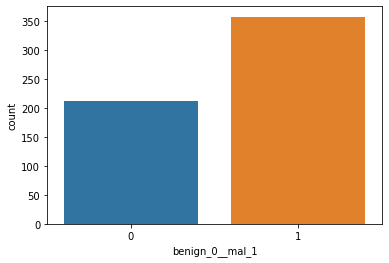

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

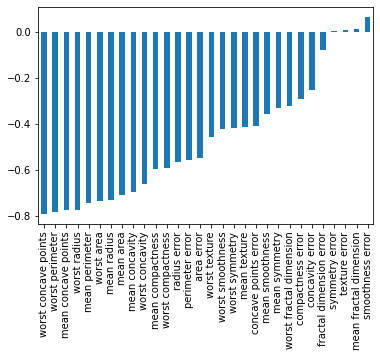

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

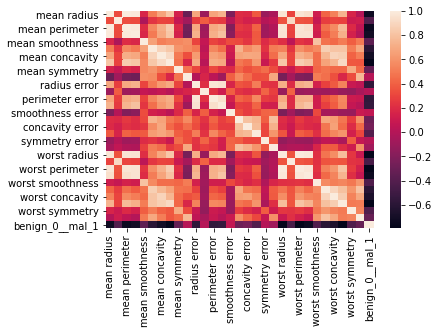

In [6]:
sns.heatmap(df.corr())

In [7]:
X = df.drop('benign_0__mal_1' , axis=1).values
y = df['benign_0__mal_1'].values


In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [18]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy' ,optimizer='adam')

In [19]:
model.fit(x=X_train , y=y_train , epochs=400 , validation_data=(X_test , y_test))

Epoch 1/400
14/14 [==============================] - 0s 9ms/step - loss: 0.6641 - val_loss: 0.6417
Epoch 2/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6237 - val_loss: 0.5927
Epoch 3/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5787 - val_loss: 0.5399
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 0.5299 - val_loss: 0.4836
Epoch 5/400
14/14 [==============================] - 0s 3ms/step - loss: 0.4797 - val_loss: 0.4325
Epoch 6/400
14/14 [==============================] - 0s 2ms/step - loss: 0.4304 - val_loss: 0.3830
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 0.3845 - val_loss: 0.3419
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 0.3432 - val_loss: 0.3050
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.2802
Epoch 10/400
14/14 [==============================] - 0s 3ms/step - loss: 0.2801 - val_loss: 0.2553
Epoch 11/

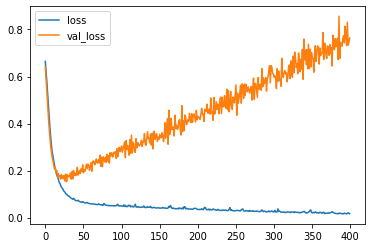

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy' ,optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor = 'val_loss' , mode ='min',verbose=1,patience = 25)

In [24]:
model.fit(x=X_train , y=y_train , epochs=600 , validation_data=(X_test , y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6568 - val_loss: 0.6380
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6276 - val_loss: 0.6057
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5981 - val_loss: 0.5710
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5625 - val_loss: 0.5317
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5094 - val_loss: 0.4689
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4566 - val_loss: 0.4220
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4048 - val_loss: 0.3706
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3582 - val_loss: 0.3350
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3180 - val_loss: 0.2936
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2860 - val_loss: 0.2721
Epoch 11/

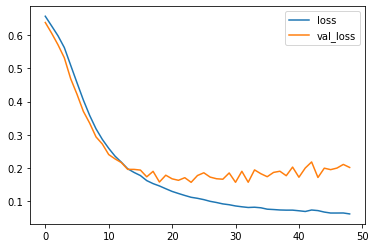

In [27]:
modelloss = pd.DataFrame(model.history.history)
modelloss.plot()

In [28]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy' ,optimizer='adam')

In [31]:
model.fit(x=X_train , y=y_train , epochs=600 , validation_data=(X_test , y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7162 - val_loss: 0.6945
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6886 - val_loss: 0.6746
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6782 - val_loss: 0.6594
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6661 - val_loss: 0.6419
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6568 - val_loss: 0.6257
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6439 - val_loss: 0.5987
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6078 - val_loss: 0.5714
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5998 - val_loss: 0.5360
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.4993
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5501 - val_loss: 0.4646
Epoch 11/

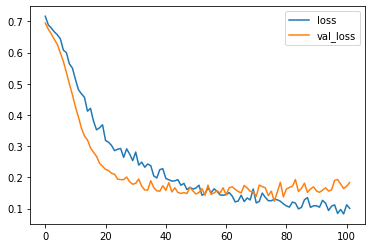

In [32]:
modeloss = pd.DataFrame(model.history.history)
modeloss.plot()

In [34]:
predictions = model.predict_classes(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [37]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 9 79]]
